# Beispiele

## Einfürhung in Machine Learning

### Beispiel: Linear Regression as Exemplary `sklearn` Process

Im Themenblock "Data Understanding: Pair-wise und Multivariate Explorations" haben wir schon ein einfaches Beispiel eines Supervised Learning Modells kennengelernt - die einfache lineare Regression. Wir gehen in diesem Beispiel nun den typischen Ablauf eines Machine Learning Prozesses in `sklearn` durch. Hierzu generieren wir uns folgende Daten.

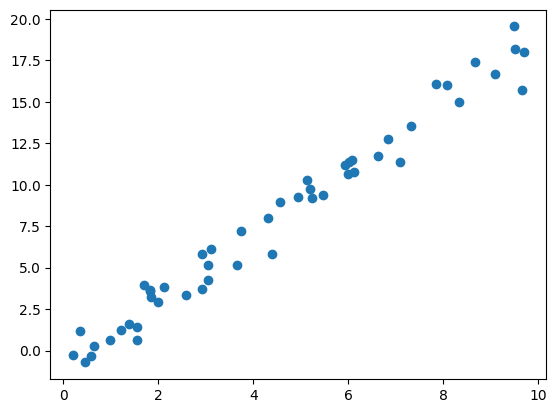

In [1]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
X = 10 * rng.rand(50, 1)
y = 2 * X - 1 + rng.randn(50, 1)
plt.scatter(X, y);

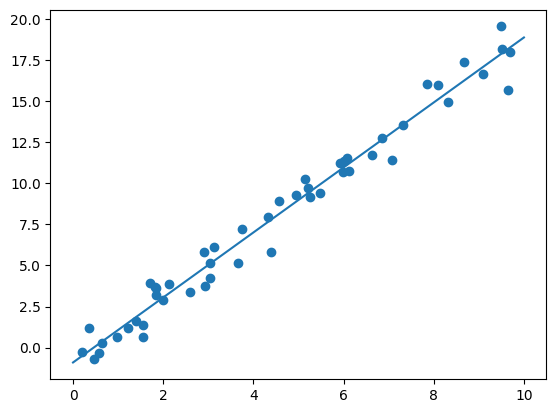

In [2]:
# Choose class of model
from sklearn.linear_model import LinearRegression

# Choose Hyperparameters
model = LinearRegression(fit_intercept=True)

# Fit the model to data
model.fit(X, y)

# Predict based on new data
Xfit = np.linspace(0, 10).reshape(-1, 1)
yfit = model.predict(Xfit)
plt.scatter(X, y)
plt.plot(Xfit, yfit)

In [8]:
model.coef_

array([[1.9776566]])

In [9]:
model.intercept_

array([-0.90331073])

### Beispiel: Polynomiale Regression
In diesem Beispiel schauen wir uns eine Polynomfunktion in Python näher an. Hierzu müssen wir auf die `PolynomialFeatures` und die `LinearRegression` Klassen zugreifen, die wir in `sklearn` finden. Schauen wir uns den Docstring der `PolynomialFeatures`
<div>
    <img src=attachment:458a207b-649f-4bd9-8819-5327b61bcaed.png width=500>
</div>

und der `LinearRegression`

<div>
    <img src=attachment:bb39a2b1-4454-45ca-8cd5-ed0b3012f87b.png width=500>
</div>

an. Was müssen wir wohl tun, um eine _polynomiale Regression_ durchzuführen?
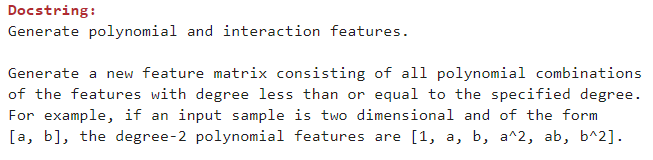
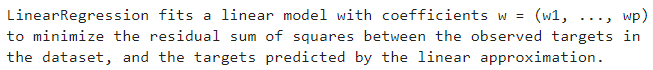

In [4]:
# Import
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate some cubic data
def make_data(N=100, err=0.08):
    X = 2 * np.random.rand(N, 1) - 1
    y = X.ravel() ** 3
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

In [5]:
# Let's look at the polynomial features
poly_features = PolynomialFeatures(3).fit_transform(X)
print(poly_features[:2, :])
print(X[:2])

[[ 1.         -0.27871388  0.07768143 -0.02165089]
 [ 1.          0.76710024  0.58844279  0.45139461]]
[[-0.27871388]
 [ 0.76710024]]


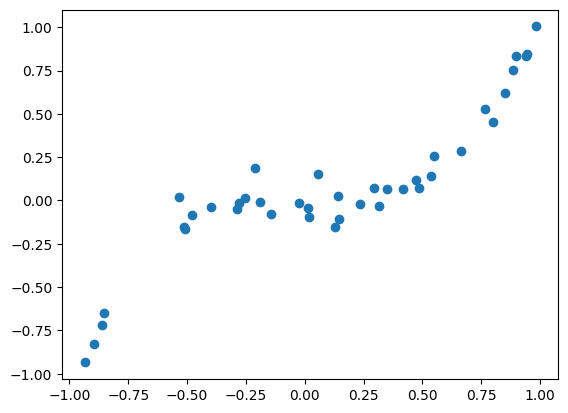

In [6]:
plt.scatter(X, y)

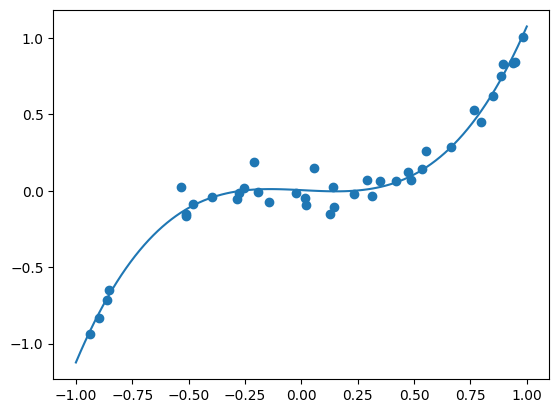

In [9]:
# Use them for linear regression fit
model = LinearRegression().fit(poly_features, y)

# Plot
Xfit = np.linspace(-1, 1, 100).reshape(-1, 1)
poly_features_fit = PolynomialFeatures(3).fit_transform(Xfit)
yfit = model.predict(poly_features_fit)
plt.scatter(X, y)
plt.plot(Xfit, yfit)

In [10]:
# The above: using pipeline
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression())

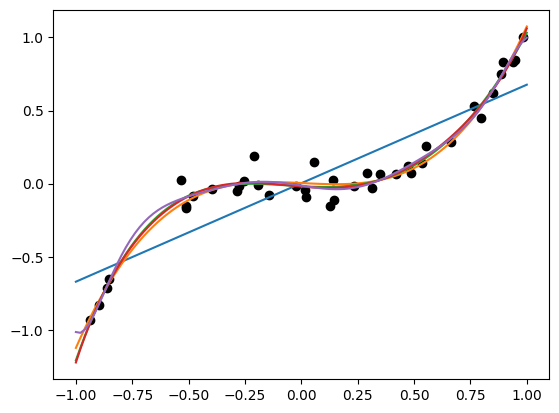

In [12]:
# Plot data again
plt.scatter(X, y, color='black')

# Plot several fits
for degree in [1, 3, 5, 7, 9]:
    yfit = PolynomialRegression(degree).fit(X, y).predict(Xfit)
    plt.plot(Xfit, yfit)